# Dimensionality reduction

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston['data'], boston['target']
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
from sklearn.decomposition import PCA

print(X.shape)

boston_pca = PCA()
boston_pca.fit(X)

(506, 13)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
boston_pca.explained_variance_ratio_

array([8.05814643e-01, 1.63050854e-01, 2.13486883e-02, 6.95695814e-03,
       1.30786367e-03, 7.27742761e-04, 4.20024207e-04, 2.48721489e-04,
       8.53904192e-05, 3.08110199e-05, 6.65495193e-06, 1.56785857e-06,
       7.96571657e-08])

<Container object of 13 artists>

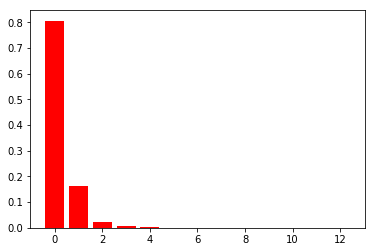

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(X.shape[1]), boston_pca.explained_variance_ratio_, color="r", align="center")

In [7]:
import numpy as np

np.sum(boston_pca.explained_variance_ratio_[:2])

0.9688654974812381

In [8]:
boston_pca = PCA(n_components=2)
boston_pca.fit(X)
X_proj = boston_pca.transform(X)

In [9]:
X_proj.shape

(506, 2)

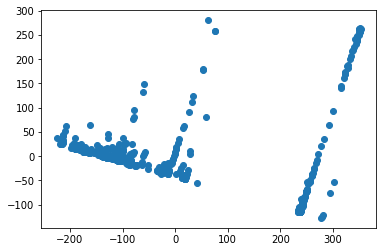

In [10]:
plt.scatter(X_proj[:,0],X_proj[:,1]);

In [11]:
boston_pca.components_

array([[ 2.90793419e-02, -4.35901380e-02,  2.83311855e-02,
        -5.55834285e-05,  4.49723983e-04, -1.16817521e-03,
         8.36340851e-02, -6.56167701e-03,  4.50056441e-02,
         9.49748862e-01,  5.60015636e-03, -2.91215007e-01,
         2.29433981e-02],
       [ 5.95358534e-03,  1.17454545e-03, -4.94881025e-03,
        -1.02672761e-04,  1.83085404e-06,  3.65743217e-04,
        -5.72142592e-03,  3.53613793e-04, -8.61821319e-03,
        -2.92380996e-01, -2.52890005e-03, -9.56193028e-01,
         5.76700106e-03]])

# Clustering

In [16]:
from sklearn.cluster import KMeans
boston_kmeans = KMeans(n_clusters=2)
boston_kmeans.fit(X_proj)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

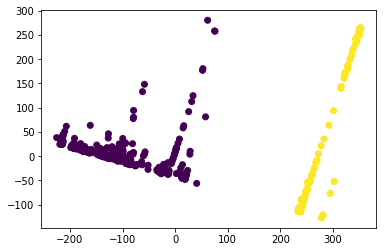

In [17]:
y_pred = boston_kmeans.predict(X_proj)
plt.scatter(X_proj[:,0], X_proj[:,1], c=y_pred);

See this [example](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) for a great comparison.

# Density estimation

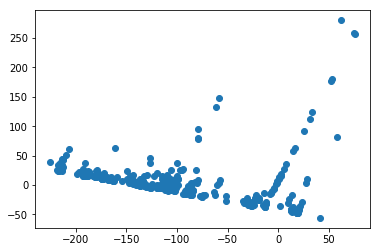

In [18]:
from sklearn import svm

boston_ocsvm = svm.OneClassSVM(gamma = 1e-3)
X1 = X_proj[y_pred==0,:]
plt.scatter(X1[:,0], X1[:,1])

In [19]:
boston_ocsvm.fit(X1)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

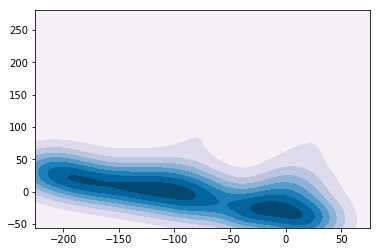

In [20]:
xmin = np.min(X1[:,0])
xmax = np.max(X1[:,0])
ymin = np.min(X1[:,1])
ymax = np.max(X1[:,1])

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 500), np.linspace(ymin, ymax, 500))

Z = boston_ocsvm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.PuBu);
#plt.scatter(X1[:,0], X1[:,1])

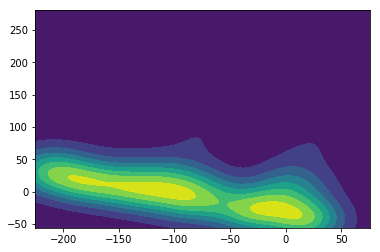

In [21]:
plt.contourf(xx, yy, Z)